In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv(r"C:\Users\iampr\Downloads\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


ANSWER-1

1. PassengerId - qualititative , nominal since it is unique ID without any meaningful value or order
2. Survived - qualitative nominal since value has no order and used only for classification
3. P class - ordinal as it has a ranking system
4. name - nominal as it has no order or meaningful value
5. sex - nominal as value has no order and used only for classification
6. age - ratio as it has a true zero point allowing it to do mathematical calculations
7. sibsp - ratio as it has a true zero point allowing it to do mathematical calculations
8. Parch - ratio as it has a true zero point allowing it to do mathematical calculations
9. Ticket - qualititative , nominal since it is unique ID without any meaningful value or order
10. Fare - Interval as the difference between is meaningful and it does not have a true zero point
11. Cabin - Nominal nominal as it has no order or meaningful value
12. Embarked - nominal as they are not ordered


SUMMARY STATISTICS

ANSWER-2

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
#Since only these columns have ratio/interval and have meaningful values
headers=[ 'Age' , 'SibSp' , 'Parch' , 'Fare']

for i in headers:
    iqr = np.subtract(*np.percentile(df[i] , [75 , 25]))
    print(i ,'IQR is: ', iqr)
        


Age IQR is:  nan
SibSp IQR is:  1.0
Parch IQR is:  0.0
Fare IQR is:  23.0896


In [48]:
headers=[ 'Age' , 'SibSp' , 'Parch' , 'Fare']

for i in headers:
    mode = df[i].mode()
    print(i,'mode is: ',mode)

Age mode is:  0    24.0
Name: Age, dtype: float64
SibSp mode is:  0    0
Name: SibSp, dtype: int64
Parch mode is:  0    0
Name: Parch, dtype: int64
Fare mode is:  0    8.05
Name: Fare, dtype: float64


In [49]:
headers=[ 'Age' , 'SibSp' , 'Parch' , 'Fare']

for i in headers:
    range = df[i].max()-df[i].min()
    print(i,'range is: ',range)

Age range is:  79.58
SibSp range is:  8
Parch range is:  6
Fare range is:  512.3292


PassengerId - Since it is a unique id and nominal we cannot use any measure of central tendency
Surived - mode as we can compare the number of people who have survived and not
Pclass - mode as we compare the number of people in each class
Name - Since it is a unique id and nominal we cannot use any measure of central tendency
Sex - mode as mode as we compare the number of people in each category
Age - mean as it keeps the data consistent
SibSp - mode as we can categorise the number of siblings/spouses
Parch - mode as we can categorise the number of parents
Ticket - Since it is a unique id and nominal we cannot use any measure of central tendency
Fare - mean as it keeps the data consistent and does not remove relevant data
Cabin - mode as we can categorise the the cabin number
Embarked - mode as we can categorise the the cabin number

ANSWER-3

In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We nave replaced missing age values with mean as with median number of outliers 
are not taken into account and replacing with mean preserves the statistical properties and significance of the data
Dropping cabin because it does not hold any relevant information to any mathematical significance and does not have any relation to the other attributes in the data

In [51]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.drop(columns=['Cabin']) #since it holds no significance
df.dropna(subset=['Embarked'], inplace=True)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

ANSWER-4

To find number of bins 
no of bins = range/bin width

In [52]:
Age_iqr = np.subtract(*np.percentile(df['Age'] , [75 , 25]))
Fare_iqr = np.subtract(*np.percentile(df['Fare'] , [75 , 25]))
print(Age_iqr, Fare_iqr)

13.0 23.1042


In [53]:
import math
age_bin_size = (2 * Age_iqr)/math.cbrt(len(df))
fare_bin_size = (2 * Fare_iqr)/math.cbrt(len(df))

bin_age = round((df['Age'].max() - df['Age'].min())/age_bin_size)
bin_fare = round((df['Fare'].max() - df['Age'].min())/fare_bin_size)
print(bin_age , bin_fare)



29 107


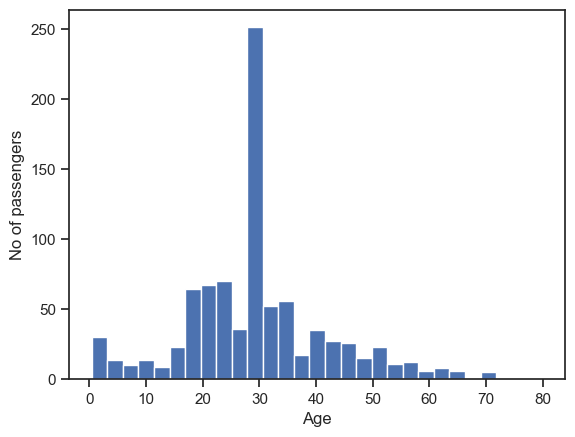

In [54]:
plt.hist(df['Age'] , bins=29)
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.show()

Most of the passengers on thr Titanic around the age 30 having very few senior citizens. From the graph we can say that there is a possibility of outliers.

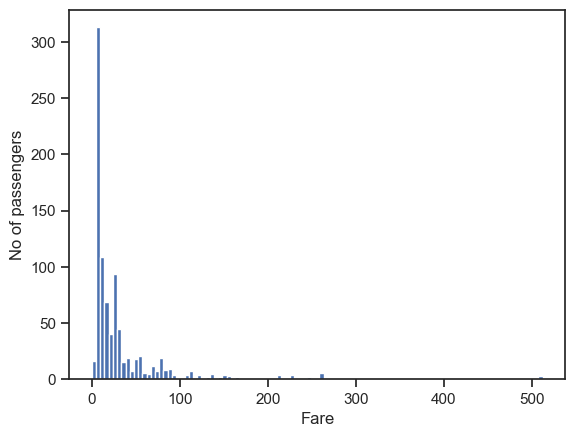

In [55]:
plt.hist(df['Fare'] , bins=107)
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.show()

Fare is mostly low indicating many lower class people have purchased more tickets
Presence of outliers is more convincing in this attribute

In [56]:
import seaborn as sns

Text(0, 0.5, 'No of passengers')

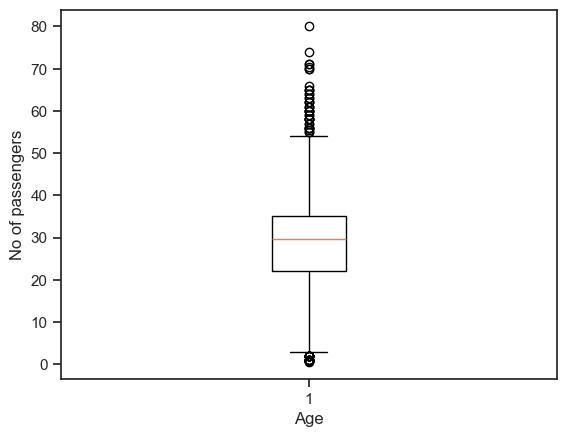

In [57]:
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('No of passengers')

the essence of a boxplot is used to determine the preseence of outliers.
Since it gives an idea of the summary of any given dataset, thus giving an idea of values that are out of bound of essential values in the range given by +-IQR which may affect the statistics.

Text(0, 0.5, 'No of passengers')

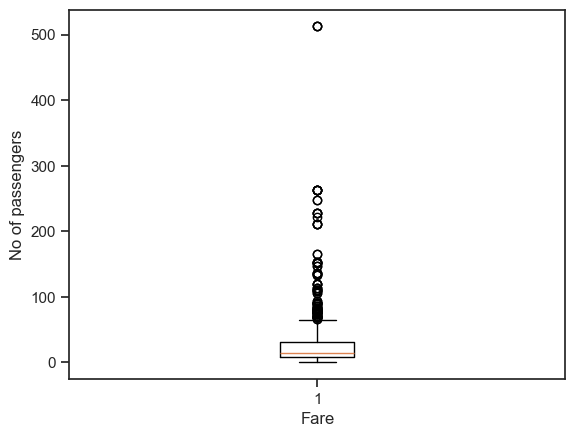

In [58]:
plt.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('No of passengers')

the essence of a boxplot is used to determine the preseence of outliers.
Since it gives an idea of the summary of any given dataset, thus giving an idea of values that are out of bound of essential values in the range given by +-IQR which may affect the statistics.

ANSWER-5

{'whiskers': [<matplotlib.lines.Line2D at 0x14fc395dcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x14fc395e2a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14fc386c050>],
 'medians': [<matplotlib.lines.Line2D at 0x14fc395e8a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14fc395eb70>],
 'means': []}

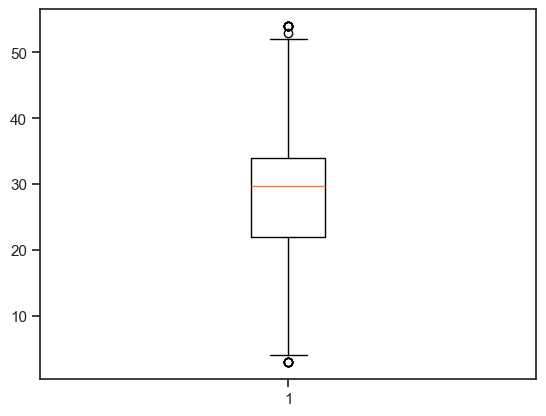

In [59]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
IQR = q3 - q1
#min allowed value
lower_bound = q1 - 1.5 * IQR
#max allowed value
upper_bound = q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
#keeping data that exists between the minimum and maximum allowed values 
#removing outliers

#boxplot of Age after removing outliers
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14fc36cd8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x14fc36cfa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x14fc38c8050>],
 'medians': [<matplotlib.lines.Line2D at 0x14fc3624470>],
 'fliers': [<matplotlib.lines.Line2D at 0x14fc36247d0>],
 'means': []}

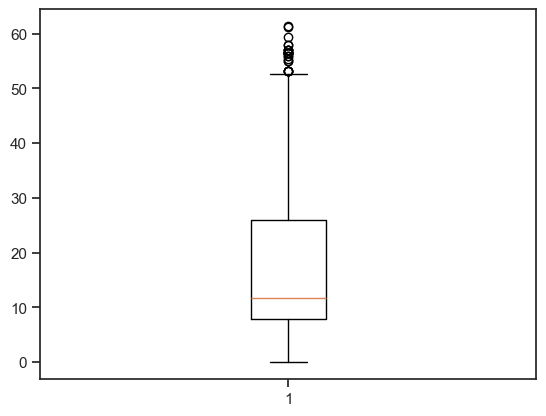

In [60]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
IQR = q3 - q1

#min allowed value
lower_bound = q1 - 1.5 * IQR
#max allowed value
upper_bound = q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
#keeping data that exists between the minimum and maximum allowed values 
#removing outliers

#boxplot of Fare after removing outliers
plt.boxplot(df['Fare'])

ANSWER-6

In [61]:
from scipy.stats import zscore
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

In [62]:
data = sorted(df['Fare'])
p = [(data.index(i) - 0.5) / len(data) for i in data]
z = zscore(p)

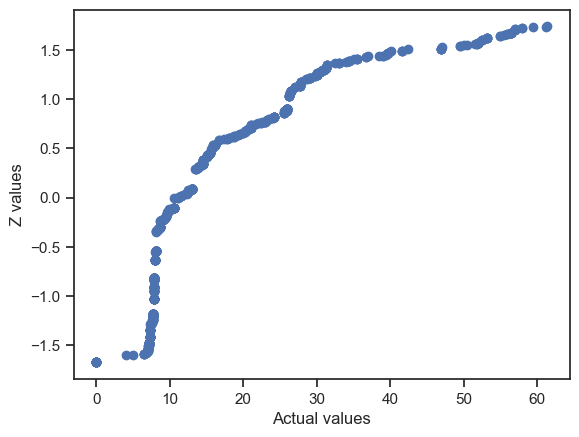

In [63]:
plt.scatter(data , z)
plt.ylabel('Z values')
plt.xlabel('Actual values')
plt.show()


Since the calculated and the theoretical values is not related linearly it does not come ftom a normal distribution

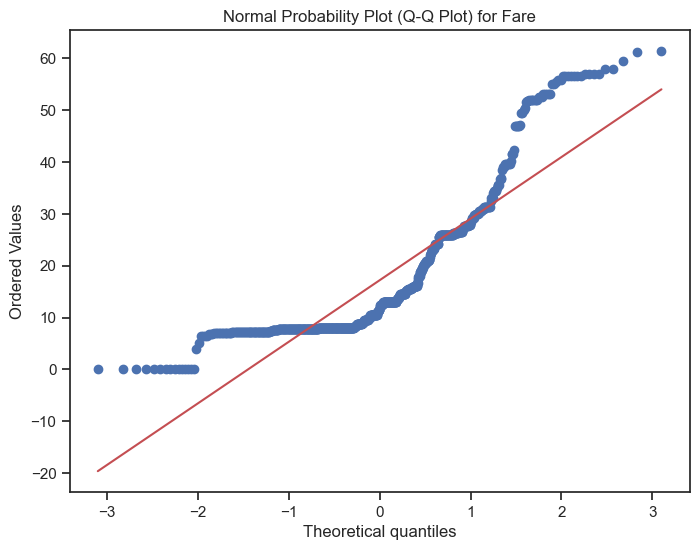

In [64]:
data = sorted(df['Fare'])
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Normal Probability Plot (Q-Q Plot) for Fare")
plt.show()


ANSWER-7

Text(0.5, 1.0, 'Correlation between age, fare and SibSp')

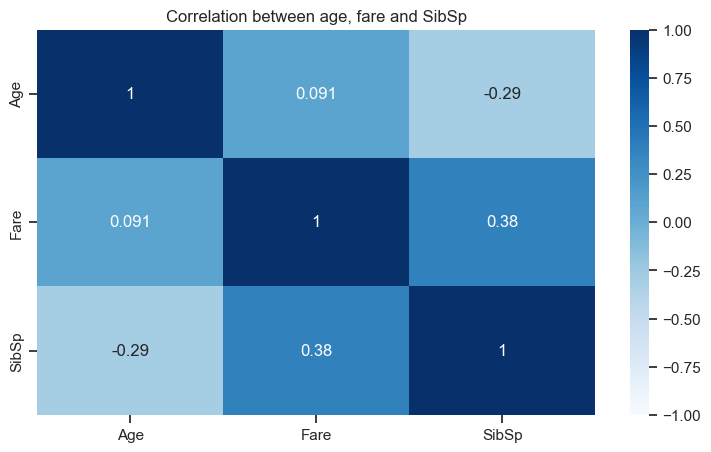

In [65]:
import seaborn as sb
numerical_cols = ['Age', 'Fare', 'SibSp']
data = df[numerical_cols]
corMat = data.corr()
corThreshold = 0.169
plt.figure(figsize=(9,5))
sb.heatmap(corMat, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation between age, fare and SibSp')

ANSWER-8

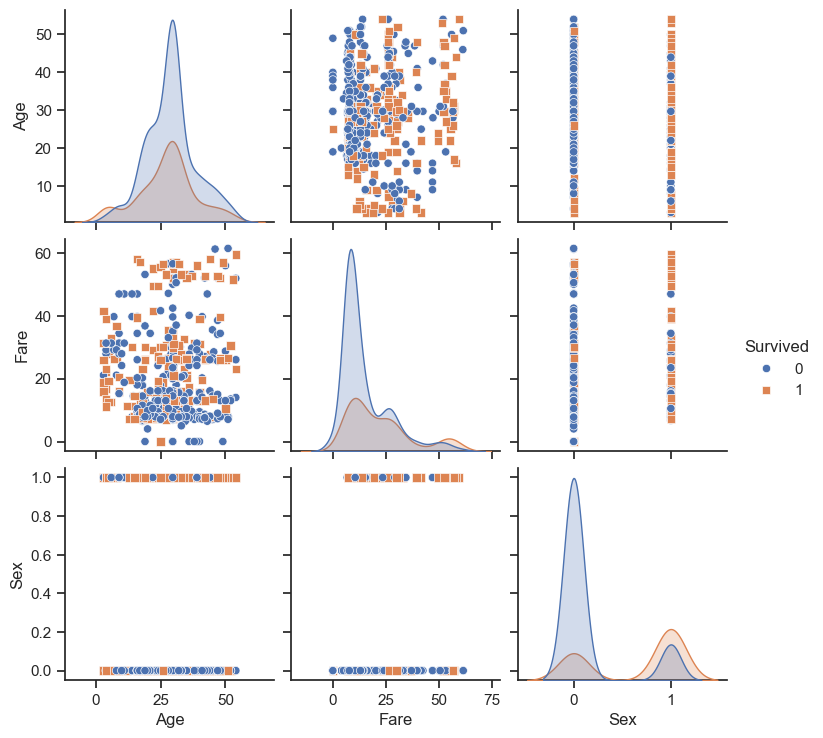

In [66]:
df1 = df
df1['Sex'] = df1['Sex'].replace({'male':0, 'female':1})

sb.set(style = 'ticks')
sb.pairplot(df1, vars=['Age', 'Fare', 'Sex'], hue='Survived', markers=['o', 's'])

In the given paiplot, we can notice the trend that
    1. Older people have not survived more as they might not have as high of a survival chance compared to younger people
    2. The second set of pairplot shows that the number of deaths is more for the cheaper fares, inferring the safety for the cheaper fares   has been compramised.
    3. More men have lost their lives as to women as the women and the children were evacuvated first.

ANSWER - 9

NULL hypothesis : Fare does not have an impact on Survival
Alternate hypothesis : Fare does have an impact on Survival

In [67]:
from scipy import stats

#Making a sample of 25
df_sample = df.sample(n = 25)


#Size of population
n_mu = 889

#Converting to array of only fare prices
n_fare = np.array(df_sample['Fare'])
print(n_fare)

alpha = 0.05

t_stat, p_value = stats.ttest_1samp(n_fare , n_mu)
print("P-value is:", p_value)



#results
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

[13.      7.8958  9.5     0.      8.05   27.9     7.7958 50.4958  7.925
  8.05    7.75   24.15   55.9    56.4958 13.      9.825   6.4375  7.2292
 52.     18.      7.8542 13.     14.5     6.4958 13.    ]
P-value is: 9.157970463643935e-43
Reject the null hypothesis


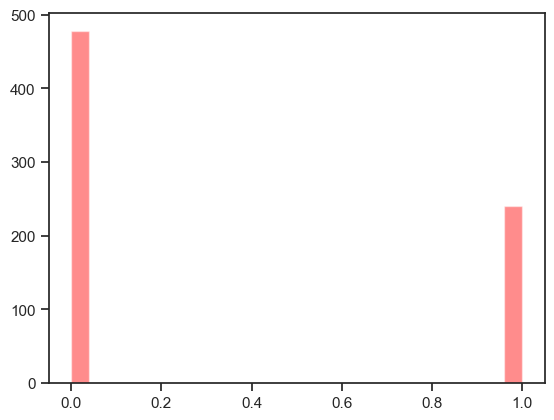

In [68]:
plt.hist(df['Survived'], bins=25, alpha=0.45, color='red') 
plt.show()

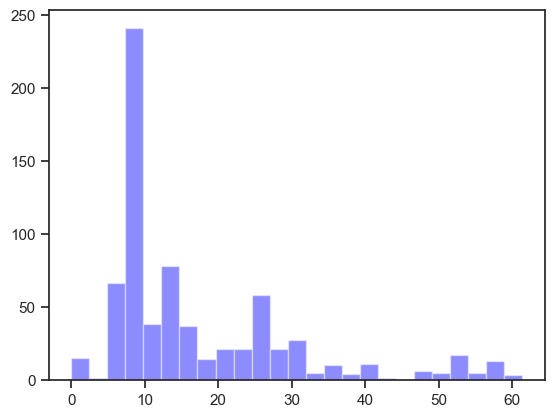

In [69]:
plt.hist(df['Fare'], bins=25, alpha=0.45, color='blue') 
plt.show()

Since computed P-value is lesser than the significance level given we can reject the null hypothesis and say that the fares of the passengers in the titanic did have an impact on their survival rates

ANSWER-10

In [70]:
import random
from scipy.stats import norm
sample_size = round(random.random() * len(df))

confidence_level = 0.95
alpha = (1 - confidence_level)
df2 = df.sample(n=sample_size)

SE = (df2['Age'].std())/math.sqrt(sample_size)
z = norm.ppf(1-alpha/2)
MOE = z * SE

lower_bound = np.mean(df2['Age']) - MOE
upper_bound = np.mean(df2['Age']) + MOE

print('[',lower_bound,',', upper_bound,']')

[ 27.193581317566903 , 29.483970179566242 ]


The margin of error is calculated for the age category. Since the confidence interval isnt too wide, suggesting that the analysis done on the given dataset is mroe accurate than not. Below, is the same analysis for the Fares category. 

In [71]:
import random
from scipy.stats import norm
sample_size = round(random.random() * len(df))

confidence_level = 0.95
alpha = (1 - confidence_level)
df2 = df.sample(n=sample_size)

SE = (df2['Fare'].std())/math.sqrt(sample_size)
z = norm.ppf(1-alpha/2)
MOE = z * SE

lower_bound = np.mean(df2['Fare']) - MOE
upper_bound = np.mean(df2['Fare']) + MOE

print('[',lower_bound,',', upper_bound,']')

[ 16.357638229768135 , 18.92530059376128 ]
